In [1]:
import os
import cv2
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from matplotlib import pyplot as plt

/root/miniconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
def visualize(config_file, images_dir, title):
    cfg = get_cfg()
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
    cfg.MODEL.DEVICE = 'cpu'
    cfg.merge_from_file(config_file)
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
    predictor = DefaultPredictor(cfg)
    plt.figure(figsize=(20, 5), dpi=300)
    plt.suptitle(title, fontsize=20)
    for plt_index, image in enumerate(os.listdir(images_dir)):
        im = cv2.imread(os.path.join(images_dir, image))
        outputs = predictor(im)
        v = Visualizer(im[:, :, ::-1], metadata=MetadataCatalog.get("voc_2012_trainval"))
        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        plt.subplot(1, 3, plt_index+1)
        plt.imshow(out.get_image())
    plt.tight_layout()
    plt.show()

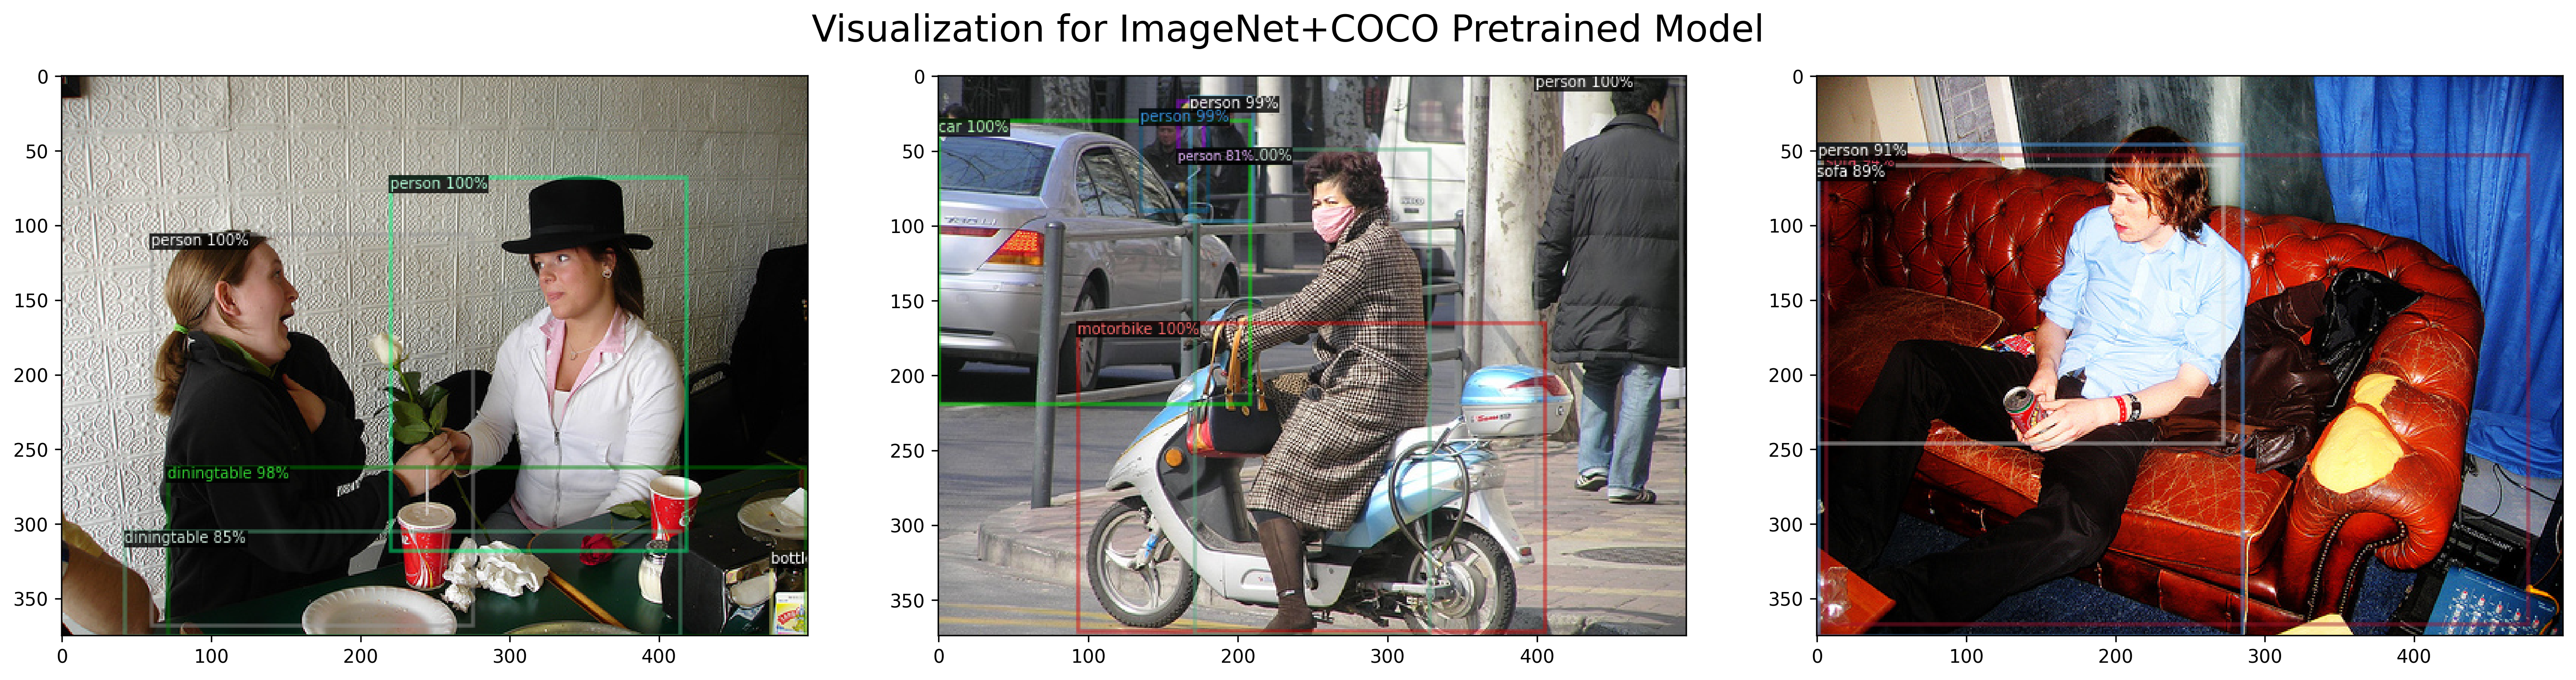

In [31]:
visualize("configs/PascalVOC-Detection/faster_rcnn_R_50_FPN_coco_pretrained.yaml",
    "datasets/inference",
    "Visualization for ImageNet+COCO Pretrained Model")

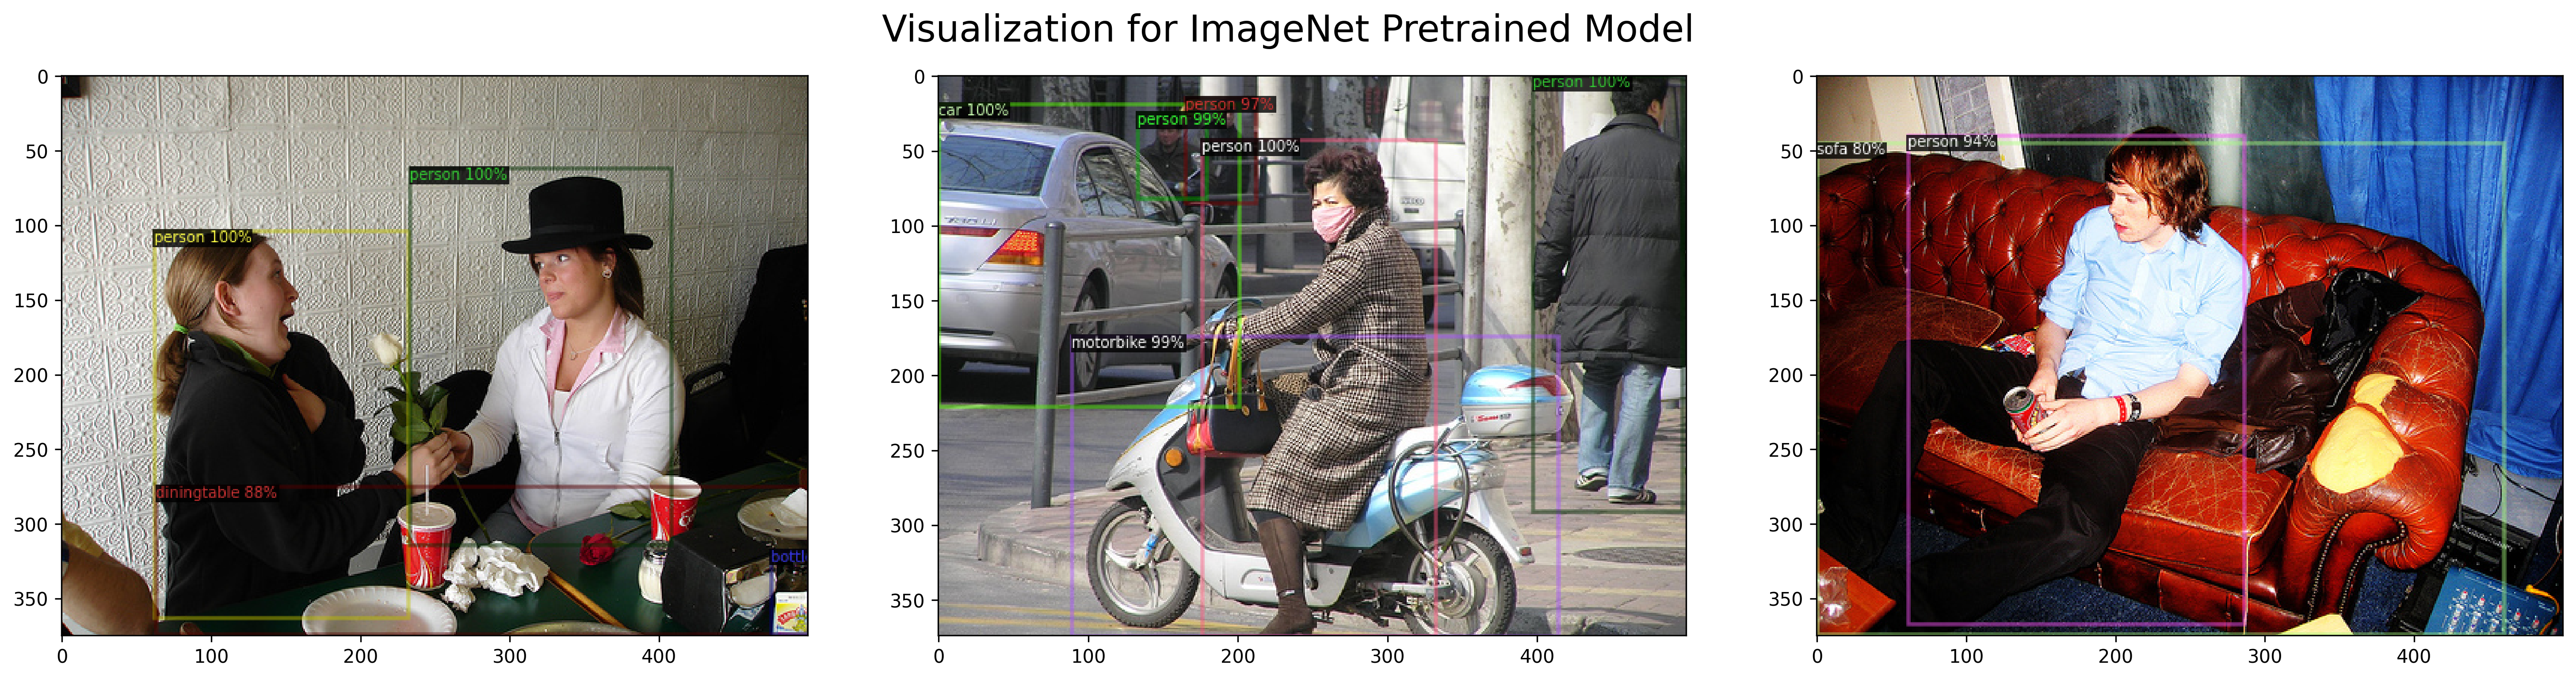

In [32]:
visualize("configs/PascalVOC-Detection/faster_rcnn_R_50_FPN_imagenet_pretrained.yaml",
    "datasets/inference",
    "Visualization for ImageNet Pretrained Model")

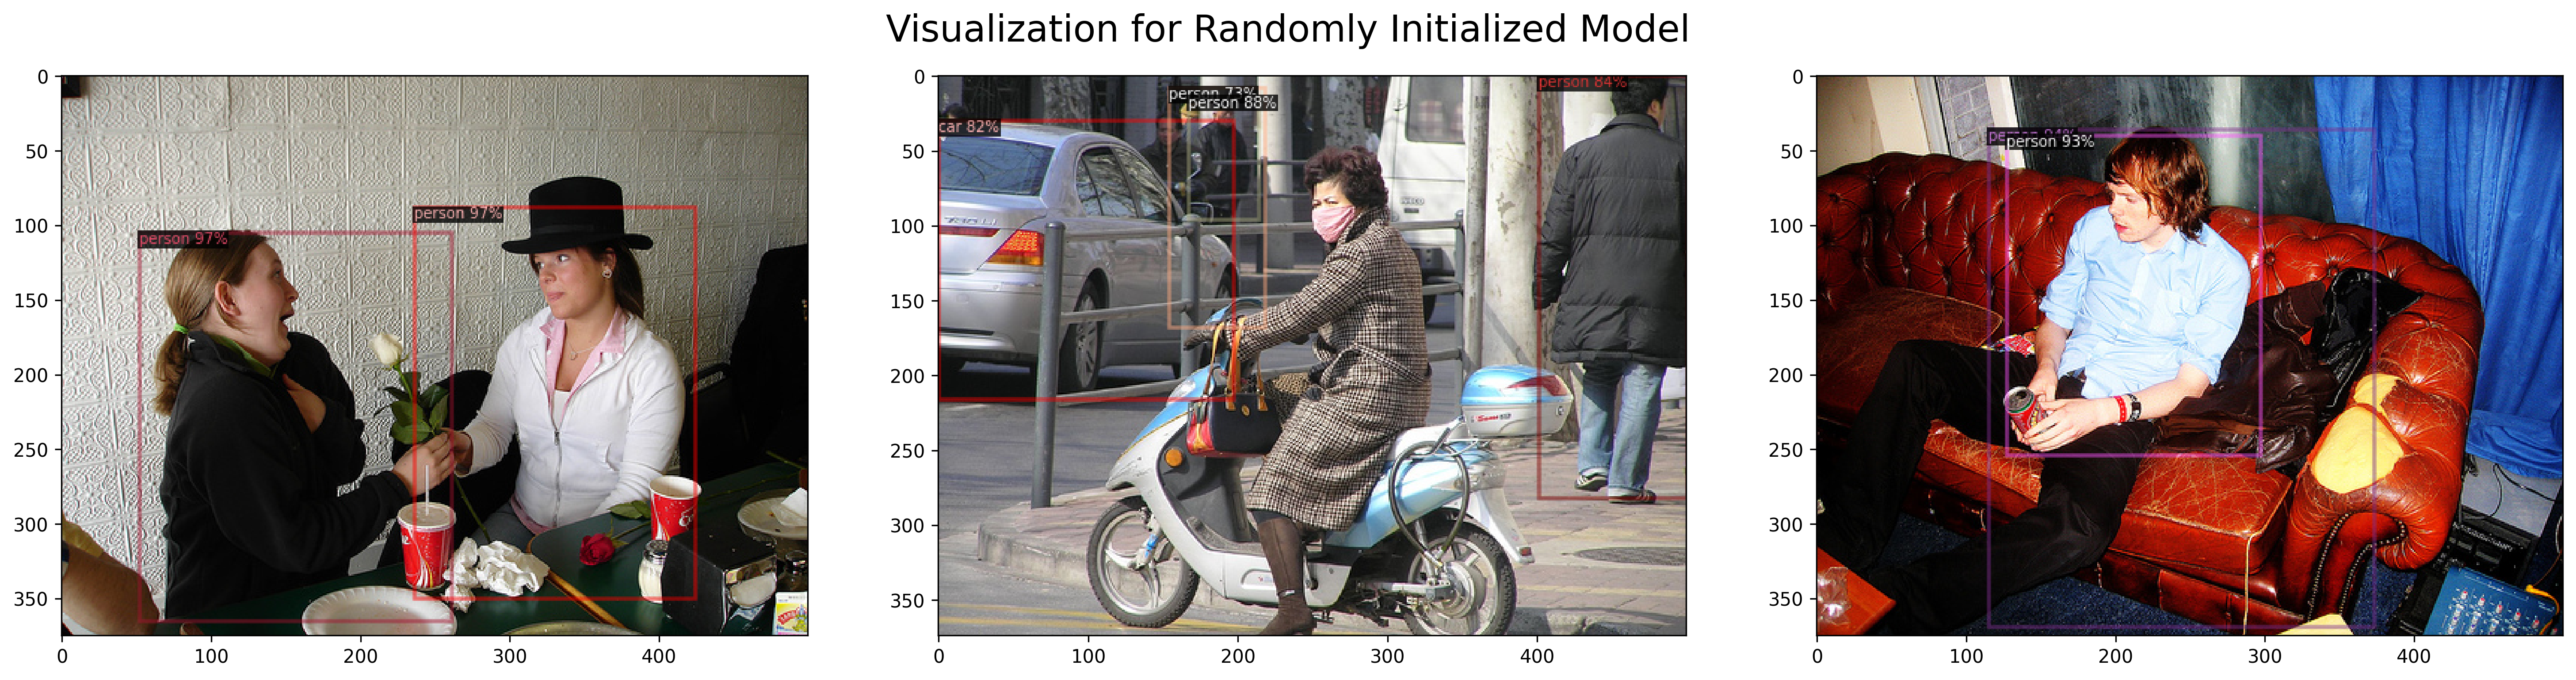

In [34]:
visualize("configs/PascalVOC-Detection/faster_rcnn_R_50_FPN_scratch.yaml",
    "datasets/inference",
    "Visualization for Randomly Initialized Model")